In [19]:
import seaborn as sns
import pandas as pd
import matplotlib
%matplotlib inline


In [6]:
df = pd.read_csv('train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.groupby('Sex').agg({'Survived': 'sum'}).sort_values('Survived', ascending = False)

,Survived
Sex,
female,233
male,109



Вывод: женщин выжило более чем в два раза больше

In [9]:
df.query('Survived == 1').groupby(['Sex', 'Survived']).agg({'Age': 'mean'}).round(2) 

,,Age
Sex,Survived,
female,1,28.85
male,1,27.28


Средний возраст выживших женщин - 28,85 лет, выживших мужчин - 27,28

In [10]:
df.query('Survived == 1').groupby('Embarked').agg({'Survived': 'sum'}).sort_values('Survived', ascending = False)

,Survived
Embarked,
S,217
C,93
Q,30


Наибольшее количество выживших было в порту S

In [11]:
df.query('Survived == 1').query('Age < 18').agg({'Survived': 'sum'})

Survived    61
dtype: int64

In [12]:
df.query('Age < 18').query('Survived == 0').Survived.value_counts()

0    52
Name: Survived, dtype: int64

Выживших несовершеннолетних пассажиров больше, чем погибших

In [13]:
df.query('Survived == 1').groupby('Fare').agg({'Survived': 'sum'}).sort_values('Survived', ascending = False)

,Survived
Fare,
13.0000,16
26.0000,15
7.7500,12
10.5000,9
7.9250,8
...,...
8.6625,1
29.7000,1
27.7208,1


In [14]:
df.query('Survived == 1').Sex.value_counts(normalize = True).mul(100).round(2)

female    68.13
male      31.87
Name: Sex, dtype: float64

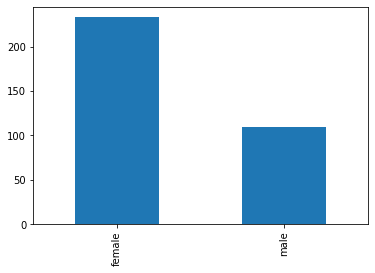

In [18]:
df.query('Survived == 1').Sex.value_counts().plot.bar()

Среди выживших 68.13% женщин, 31.87% - мужчин. 

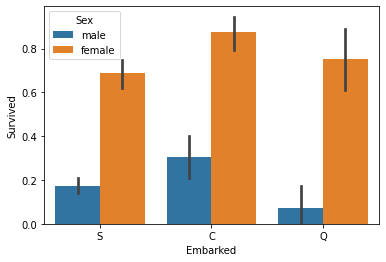

In [20]:
sns.barplot(data=df, x ='Embarked', y='Survived', hue='Sex')

Наибольшее количество мужчин и женщин выжили в порту С

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


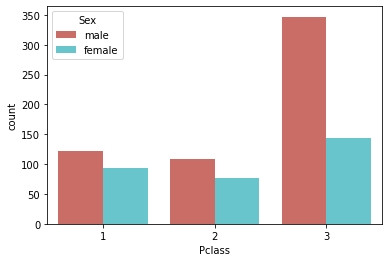

In [24]:
sns.countplot(df['Pclass'], hue = df['Sex'], palette = 'hls')

Распределение пассажиров по классам

In [25]:
df.query('Survived == 1').Age.value_counts(normalize = True).mul(100).round(2)

24.00    5.17
36.00    3.79
35.00    3.79
27.00    3.79
22.00    3.79
         ... 
55.00    0.34
32.50    0.34
12.00    0.34
0.92     0.34
47.00    0.34
Name: Age, Length: 65, dtype: float64

Распределение пассажиров по возрастам

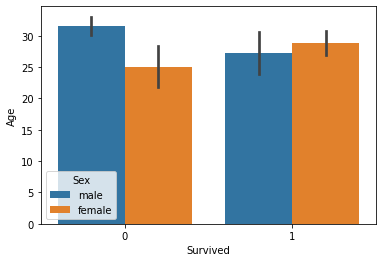

In [27]:
sns.barplot(data=df, x ='Survived', y='Age', hue='Sex')

Средний возраст выживших мужчин и женщин 25-30 лет